<a href="https://colab.research.google.com/github/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis/blob/main/experiments/AC_CGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auxiliary Classifier Conditional GAN

## Import libraries and data

In [ ]:
# IMPORT AND MOUNT DRIVE
import tensorflow as tf
import os
import os.path
import sys
import numpy as np
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # CLONE GITHUB REPOSITORY
!rm -r "COVID-Chest-X-Rays-Deep-Learning-analysis"
!git clone https://github.com/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis.git

rm: cannot remove 'COVID-Chest-X-Rays-Deep-Learning-analysis': No such file or directory
Cloning into 'COVID-Chest-X-Rays-Deep-Learning-analysis'...
remote: Enumerating objects: 1322, done.
remote: Counting objects: 100% (733/733), done.
remote: Compressing objects: 100% (565/565), done.
remote: Total 1322 (delta 445), reused 397 (delta 168), pack-reused 589
Receiving objects: 100% (1322/1322), 121.11 MiB | 26.24 MiB/s, done.
Resolving deltas: 100% (708/708), done.


In [ ]:
# LOAD DIRECTORIES
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/models')
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/tools')

In [ ]:
# LOAD TRAINING DATA

batch_size = 64

from XRaysDataset import XRaysDataset

dataset = XRaysDataset(batch_size=batch_size)
train_datasets, training_size = dataset.load(separate_classes=False)

Dataset size  3443
Number of batches for the dataset: 54


## Normal model

### Training

In [ ]:
from ACCGAN import ACCGAN

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN'
out_images_path = checkpoint_dir + "/outImages"
model = ACCGAN(batch_size=batch_size, 
                checkpoint_dir=checkpoint_dir, out_images_path=out_images_path, use_residual=True,
                n_epochs=500)

# noise used during training in order to evaluate how the network is learning
benchmarkImages, benchmarkLabels = model.generate_latent_points()

# train model
history = model.train_model(train_datasets, benchmarkImages, benchmarkLabels)

### Results

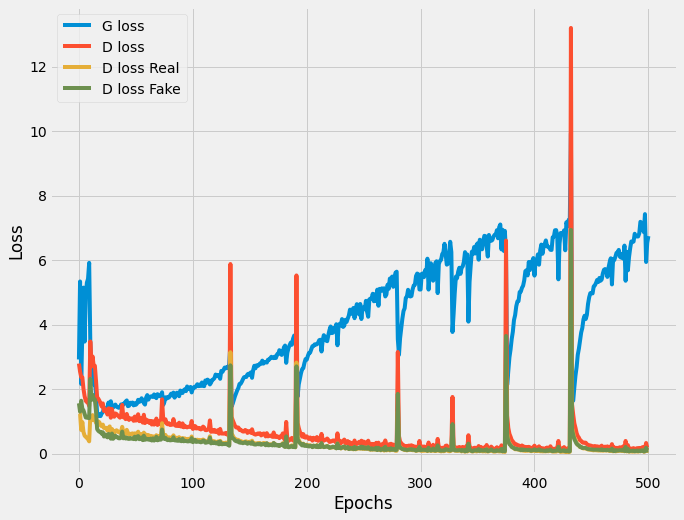

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  model.plot_stats(model.history, "Epochs", "Loss")

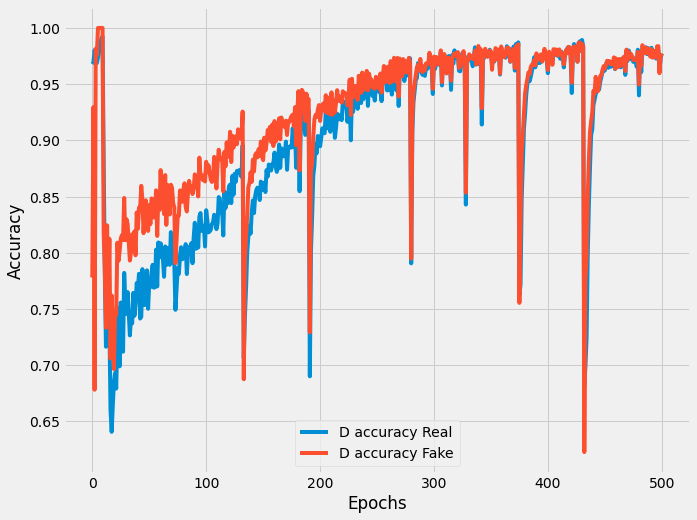

In [ ]:
with plt.style.context('fivethirtyeight'):
  model.plot_stats(model.accuracy, "Epochs", "Accuracy")

In [ ]:
from plotter import *
save_history(model.history, "/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN/history")
save_history(model.accuracy, "/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN/accuracy")

In [ ]:
from images_to_gif import images_to_gif
images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN/outImages/*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN/outImages/AC-cGAN.gif')

## Max Uncertainty model

### Training

In [ ]:
from ACCGAN_Uncertainty import ACCGANUnc

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_max_unc'
out_images_path = checkpoint_dir + "/outImages"
model = ACCGANUnc(batch_size=batch_size, 
                checkpoint_dir=checkpoint_dir, out_images_path=out_images_path, use_residual=True,
                n_epochs=500, unc_weight=1, mcd=4, unc_type="max")

# noise used during training in order to evaluate how the network is learning
benchmarkImages, benchmarkLabels = model.generate_latent_points()

# train model
history = model.train_model(train_datasets, benchmarkImages, benchmarkLabels)

### Results

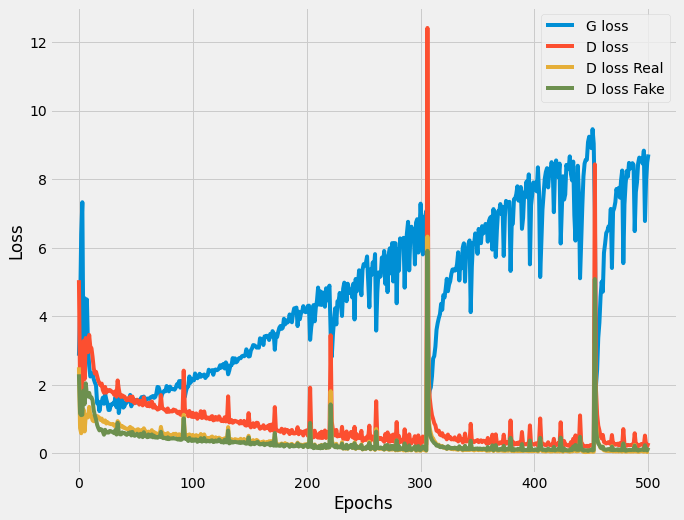

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  model.plot_losses(model.history, "Epochs", "Loss")

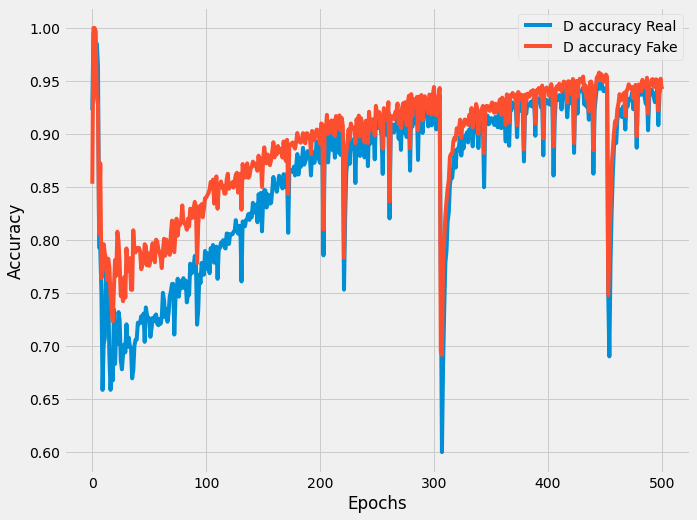

In [ ]:
with plt.style.context('fivethirtyeight'):
  model.plot_losses(model.accuracy, "Epochs", "Accuracy")

In [ ]:
from plotter import *
save_history(model.history, "/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN/history")
save_history(model.accuracy, "/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN/accuracy")

In [ ]:
images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_max_unc/outImages/*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_max_unc/outImages/AC-cGAN_unc_max.gif')

## Min Uncertainty model

### Training

In [ ]:
from ACCGAN_Uncertainty import ACCGANUnc

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_min_unc'
out_images_path = checkpoint_dir + "/outImages"
model = ACCGANUnc(batch_size=batch_size, 
                checkpoint_dir=checkpoint_dir, out_images_path=out_images_path, use_residual=True,
                n_epochs=500, unc_weight=1, mcd=4, unc_type="min")

# noise used during training in order to evaluate how the network is learning
benchmarkImages, benchmarkLabels = model.generate_latent_points()

# train model
history = model.train_model(train_datasets, benchmarkImages, benchmarkLabels)

### Results

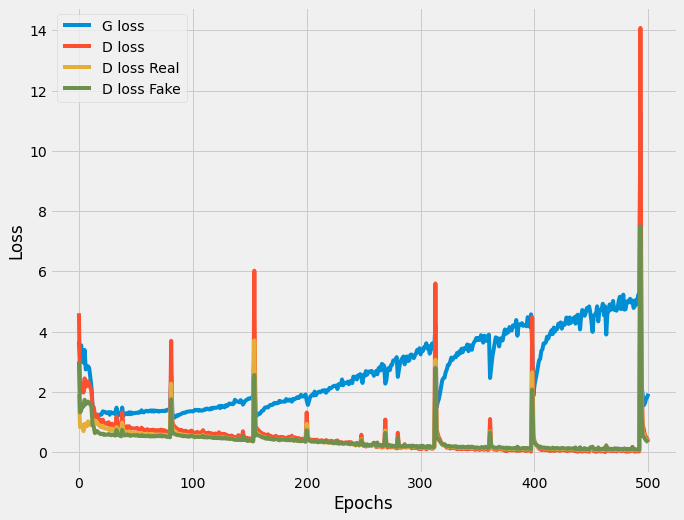

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  model.plot_losses(model.history, "Epochs", "Loss")

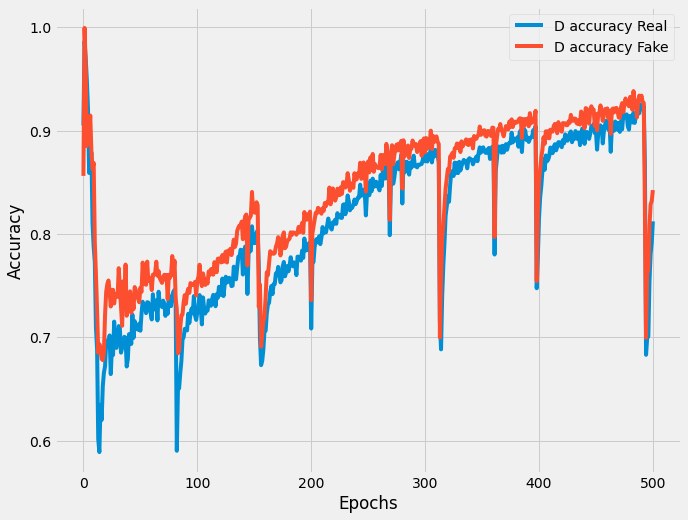

In [ ]:
with plt.style.context('fivethirtyeight'):
  model.plot_losses(model.accuracy, "Epochs", "Accuracy")

In [ ]:
from plotter import *
save_history(model.history, "/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_min_unc/history")
save_history(model.accuracy, "/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_min_unc/accuracy")

In [ ]:
images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_min_unc/outImages/*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/AC-cGAN_min_unc/outImages/AC-cGAN_min_unc.gif')